#  Support Vector Machine and Decision Trees


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Everything removing outliers, create dummies variabes had been done for you

In [27]:
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

rate_marriage   age  yrs_married  children  religious  educ  had_affair  \
0            3.0  32.0          9.0       3.0        3.0  17.0           1   
1            3.0  27.0         13.0       3.0        1.0  14.0           1   
2            4.0  22.0          2.5       0.0        1.0  16.0           1   
3            4.0  37.0         16.5       4.0        3.0  16.0           1   
4            5.0  27.0          9.0       1.0        1.0  14.0           1   

   occ2  occ3  occ4  occ5  occ6  
0     1     0     0     0     0  
1     0     1     0     0     0  
2     0     1     0     0     0  
3     0     0     0     1     0  
4     0     1     0     0     0

In [28]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

# Build a classification model using SVC using linear kernel 

In [29]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [30]:
df.drop('had_affair',axis=1)

rate_marriage   age  yrs_married  children  religious  educ  occ2  occ3  \
0               3.0  32.0          9.0       3.0        3.0  17.0     1     0   
1               3.0  27.0         13.0       3.0        1.0  14.0     0     1   
2               4.0  22.0          2.5       0.0        1.0  16.0     0     1   
3               4.0  37.0         16.5       4.0        3.0  16.0     0     0   
4               5.0  27.0          9.0       1.0        1.0  14.0     0     1   
...             ...   ...          ...       ...        ...   ...   ...   ...   
6466            5.0  32.0         13.0       2.0        3.0  17.0     0     0   
6467            4.0  32.0         13.0       1.0        1.0  16.0     0     0   
6468            5.0  22.0          2.5       0.0        2.0  14.0     0     1   
6469            5.0  32.0          6.0       1.0        3.0  14.0     0     1   
6470            4.0  22.0          2.5       0.0        2.0  16.0     1     0   

      occ4  occ5  occ6  
0        0     0     0  
1        0     0     0  
2        0     0     0  
3        0     1     0  
4        0     0     0  
...    ...   ...   ...  
6466     1     0     0  
6467     0     1     0  
6468     0     0     0  
6469     0     0     0  
6470     0     0     0  

[6366 rows x 11 columns]

In [31]:
df['had_affair']



0       1
1       1
2       1
3       1
4       1
       ..
6466    0
6467    0
6468    0
6469    0
6470    0
Name: had_affair, Length: 6366, dtype: int64

In [32]:
#Training Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('had_affair',axis=1),df['had_affair'],
                                                    test_size=0.20, random_state=101)


In [33]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
predictions = model.predict(X_test)


In [35]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493


### Trying different value of C-parameter and reruning  model

In [59]:
#C Parameter help decide to penalize missclassification
# Doesnt allow much mistakes
model = svm.SVC(kernel = 'linear', C=2**5)
model.fit(X_train,y_train)



SVC(C=32, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

0.7056514913657771


In [61]:
#Soft Margin allow mistakes
model = svm.SVC(kernel = 'linear', C=2**-5)
model.fit(X_train,y_train)

SVC(C=0.03125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       850
           1       0.64      0.25      0.36       424

    accuracy                           0.70      1274
   macro avg       0.68      0.59      0.59      1274
weighted avg       0.69      0.70      0.66      1274

0.7048665620094191


### Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [63]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=2**-5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

0.7111459968602826


In [64]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=0.1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       850
           1       0.59      0.31      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

0.7001569858712716


In [65]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66      0.62      1274

0.6577708006279435


In [66]:
model = svm.SVC(kernel = 'rbf', C=1, gamma=2)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       850
           1       0.40      0.16      0.23       424

    accuracy                           0.64      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.64      0.59      1274

0.6420722135007849


### What is the best choice for the kernel, C and gamma parameters?

The best choice seem to be using the rbf kernel with a default C param that is 1. Also it seem to be giving a better prediction when the gamma is small. My best result was obtain when I provided these values 
`svm.SVC(kernel = 'rbf', C=1, gamma=2**-5)`

# Now we will try to fit the same dataset with Decision Trees

### Decision Tree Classifier using default parameter

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
predictions = model.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       850
           1       0.45      0.39      0.42       424

    accuracy                           0.64      1274
   macro avg       0.58      0.58      0.58      1274
weighted avg       0.63      0.64      0.63      1274

0.6389324960753532


### Using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [69]:
model2g = DecisionTreeClassifier(max_depth=2, criterion='gini')
model2g.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
predictions = model2g.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [71]:
model2e = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model2e.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
predictions = model2e.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [73]:
model3g = DecisionTreeClassifier(max_depth=3, criterion='gini')
model3g.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
predictions = model3g.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [75]:
model3e = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model3e.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
predictions = model3e.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [77]:
model4g = DecisionTreeClassifier(max_depth=4, criterion='gini')
model4g.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
predictions = model4g.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


In [79]:
model4e = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model4e.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
predictions = model4e.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [81]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

In [82]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Three models, with max_depth = 2, 3 and 4. 

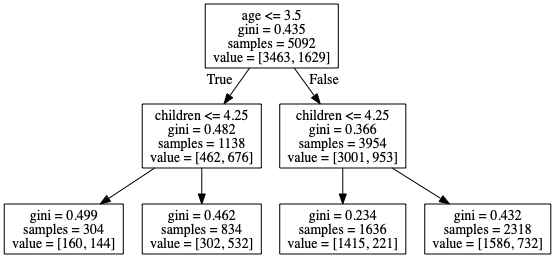

In [102]:
dot_data = StringIO()  
export_graphviz(model2g, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

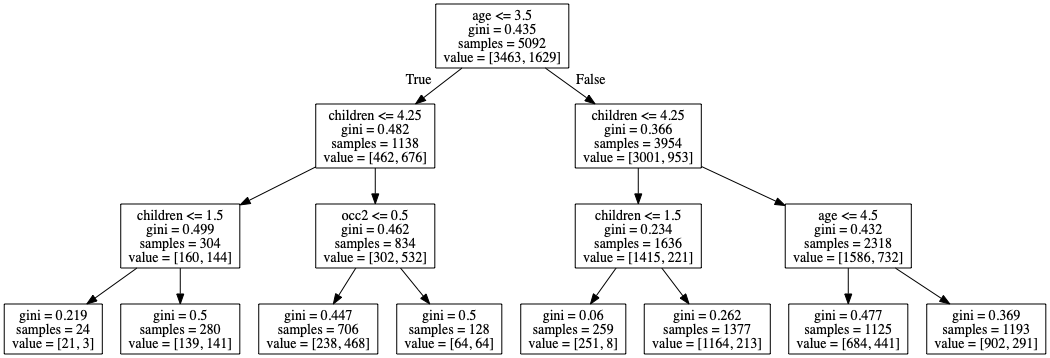

In [103]:
dot_data = StringIO()  
export_graphviz(model3g, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

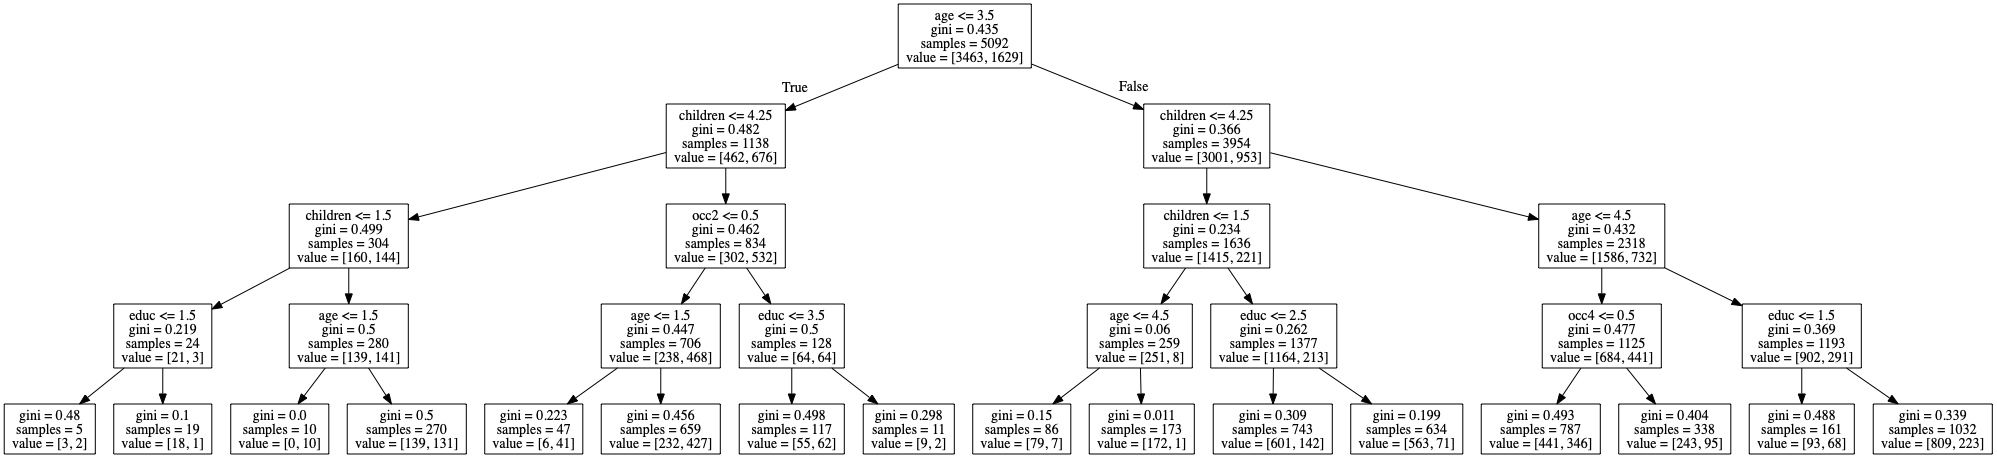

In [104]:
dot_data = StringIO()  
export_graphviz(model4g, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest Classifier with 100 trees

In [85]:
model100e = DecisionTreeClassifier(max_depth=100, criterion='entropy')
model100e.fit(X_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
predictions = model100e.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[648 202]
 [259 165]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       850
           1       0.45      0.39      0.42       424

    accuracy                           0.64      1274
   macro avg       0.58      0.58      0.58      1274
weighted avg       0.63      0.64      0.63      1274

0.6381475667189953


In [87]:
dot_data = StringIO()  
export_graphviz(model100e, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)